In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder



In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(4424, 35)

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Data Cleaning

This dataset is nearly clean thanks to the rigorous data preprocessing performed by the contributors of the [data](https://www.mdpi.com/2306-5729/7/11/146). They've addressed anomalies, outliers, and missing values.

However, a few minor cleaning steps are still needed. First, I'll modify some column names to make them more consistent and easier to work with later.

In [8]:
df =df.dropna()

In [9]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [10]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [11]:
df.shape

(4424, 35)

In [12]:
# Correct a column name that has a typo and replace single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore
df.columns = df.columns.str.replace(' ', '_')

# Remove the parenthesis
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

I'll change the data types of columns that should be categorical from ‘int’ to ‘category’ to ensure that classification models treat these columns as categorical data rather than numerical.

In [13]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[col] = df[col].astype('category')

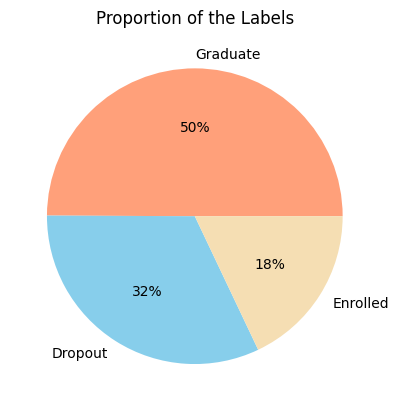

In [14]:
# Check the proportion of the labels in the target variable
labels = df['Target'].value_counts().index
values = df['Target'].value_counts().values

plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue', 'wheat'],
        autopct = '%1.0f%%')
plt.title('Proportion of the Labels');

From the pie chart above we can see that the data is imbalanced: with about 50% of the labels are 'Graduate', 32% are 'Dropout', and 18% are 'Enrolled'.

The labels are string, I will encode them as ordinal data -- 0 represents 'Dropout', 1 represents 'Enrolled', and 2 represents 'Graduate' -- since most classification models only handle numeric values.

In [15]:
# Encode the labels as ordinal data (0 - 'Dropout', 1 - 'Enrolled', and 2 - 'Graduate')
df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])
# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

# Exploratory Data Analysis

There are 34 features in this dataset. I will examine their relationship with the target variable, which is a three-class categorical data. The features that have no association with the label will be the potential variables to be removed from modeling.

**Chi-Square Independence Test for Categorical Variables**

The Chi-Square independence test will be implemented to check the association between the categorical variables and the dependent variable, with the hypothesis as follows:  

$H_{0}$: the two variables are independent  
$H_{1}$: the two variables are dependent  

$\alpha$ = 0.05

I will reject the null hypothesis and accept the alternative hypothesis if the p-value is less than 0.05, meaning the two variables are dependent. If the p-value is greater than or equal to 0.05, I fail to reject the null hypothesis, meaning the two variables are independent.

In [16]:
# list of categorical features
cats = ['Marital_status', 'Application_mode', 'Application_order',
        'Course','Daytime/evening_attendance', 'Previous_qualification',
        'Nationality','Mother_qualification', 'Father_qualification',
        'Mother_occupation', 'Father_occupation', 'Displaced',
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date',
        'Gender', 'Scholarship_holder','International']

# Get the p-values from Chi-Square indenpendence tests
p_value = []

for col in cats:
    crosstable = pd.crosstab(index = df[col],
                             columns = df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
15,Gender,0.00000
14,Tuition_fees_up_to_date,0.00000
13,Debtor,0.00000
11,Displaced,0.00000
10,Father_occupation,0.00000
9,Mother_occupation,0.00000
16,Scholarship_holder,0.00000
8,Father_qualification,0.00000
5,Previous_qualification,0.00000


Most of the p-values are close to zero, except for three variables ('Nationality', 'International', 'Educational_special_needs') with very high p-values (0.24, 0.53, 0.73), indicating that no statistically significant association between these three features and the label. I will exclude them from modeling.

In [17]:
stud_selected = df.drop(['Nationality', 'International', 'Educational_special_needs'],
                              axis = 1)

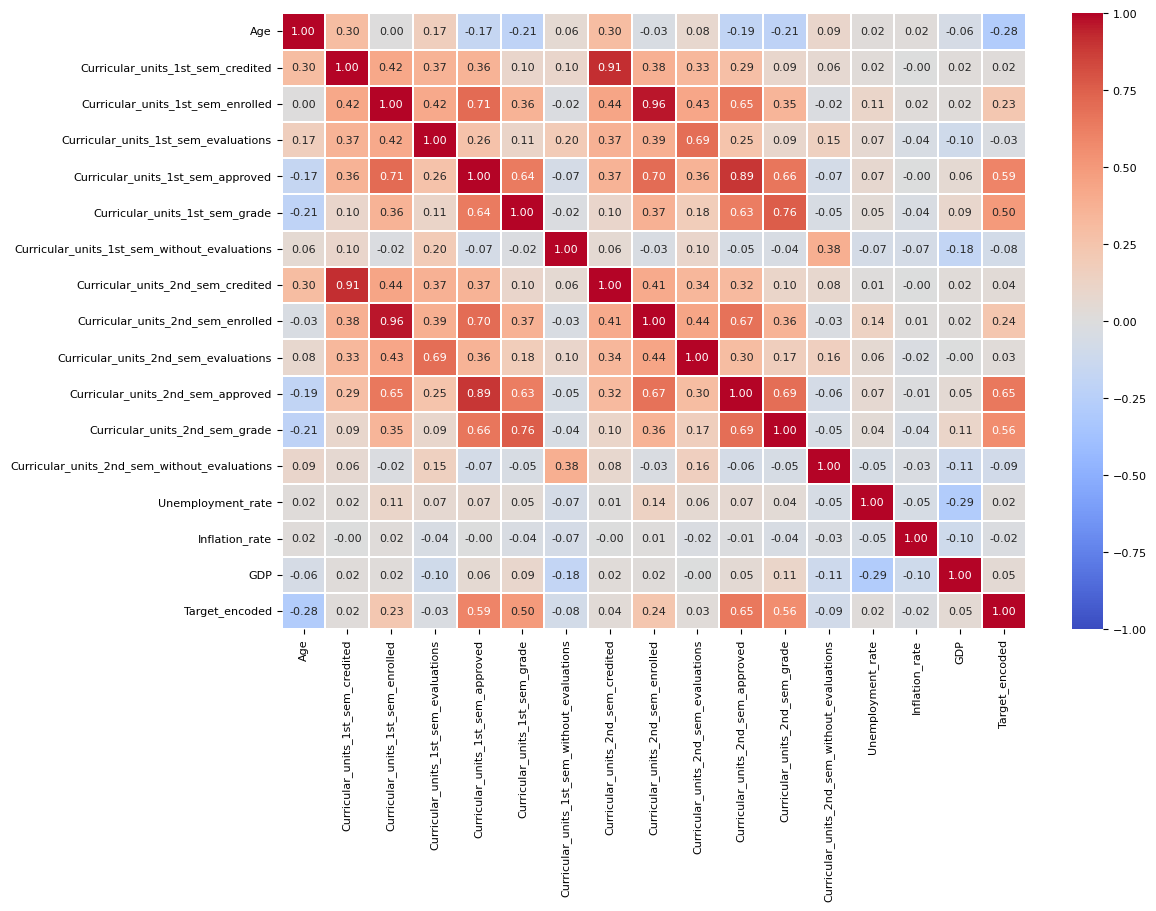

In [18]:
# Numeric features
num_features = stud_selected[['Age',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations',
       'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_encoded']]

# Heatmap of correlation matrix
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_features.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = True, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

As can be seen from the heat map, there are four features ('Curricular_units_2nd_sem_approved’, 'Curricular_units_2nd_sem_grade’, ’Curricular_units_1st_sem_approved’, 'Curricular_units_1st_sem_grade’) that have relatively high and positive correlations with the label, while some have very low correlations(e.g., 'Unemployment_rate', 'Inflation_rate')

The heat map also reveals multicollinearity among the features related to curricular units. These features represent students' academic performance at the end of the first and second semesters. I will aggregate them to get the average value between the two semesters.

In [19]:
# Averaging academic performance data across two semesters
stud_selected['avg_credited'] = stud_selected[['Curricular_units_1st_sem_credited',
                                'Curricular_units_2nd_sem_credited']].mean(axis = 1)
stud_selected['avg_enrolled'] = stud_selected[['Curricular_units_1st_sem_enrolled',
                                'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
stud_selected['avg_evaluations'] = stud_selected[['Curricular_units_1st_sem_evaluations',
                                   'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
stud_selected['avg_approved'] = stud_selected[['Curricular_units_1st_sem_approved',
                                'Curricular_units_2nd_sem_approved']].mean(axis = 1)
stud_selected['avg_grade'] = stud_selected[['Curricular_units_1st_sem_grade',
                             'Curricular_units_2nd_sem_grade']].mean(axis = 1)
stud_selected['avg_without_evaluations'] = stud_selected[['Curricular_units_1st_sem_without_evaluations',
                                           'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

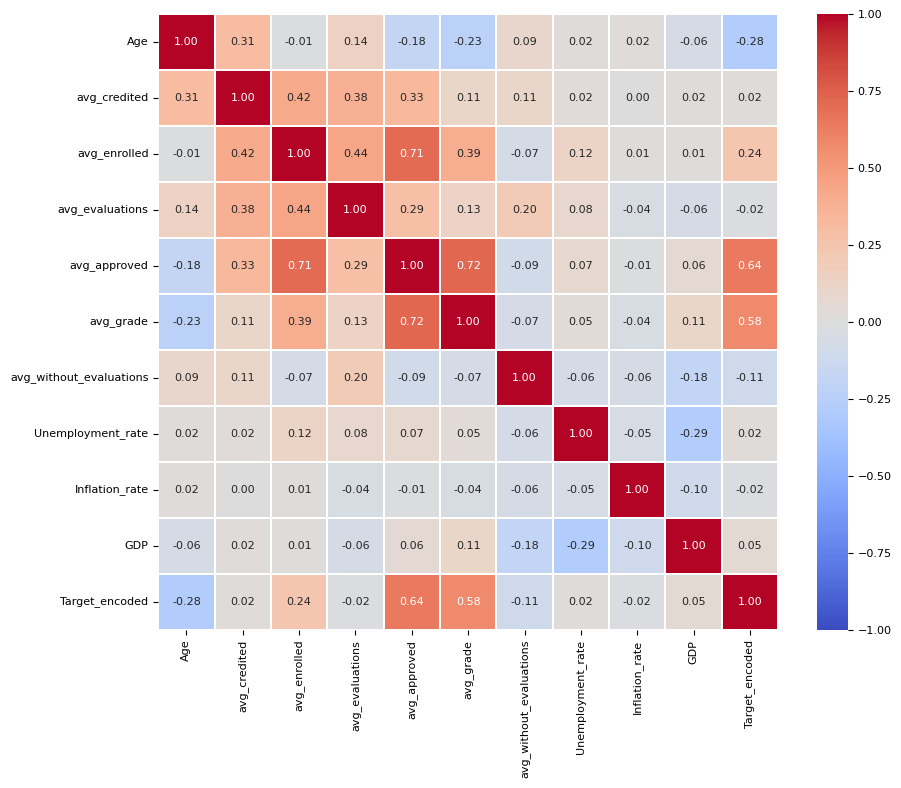

In [20]:
# plot the heat map of correlation matrix again
num_features = stud_selected[['Age', 'avg_credited', 'avg_enrolled',
                              'avg_evaluations', 'avg_approved',
                              'avg_grade', 'avg_without_evaluations',
                              'Unemployment_rate', 'Inflation_rate',
                              'GDP', 'Target_encoded']]

plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 8})
sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

The new correlation matrix above shows that 'curri_avg_approved' and 'curri_avg_grade' still have a relatively high correlation with the labels ('Target_encoded'), while 'curri_avg_credited' and 'curri_avg_evaluations', along with 'the macroeconomic data ('Unemployment_rate', 'Inflation_rate'), have very low correlations, all between -0.02 and 0.02. I will exclude these four features.

The multicollinearity still exists among the academic data. I'll take it into account when selecting the models.

Let's check how 'curri_avg_approved' and 'curri_avg_grade' are associated with students' situation at the end of the normal duration of the course.

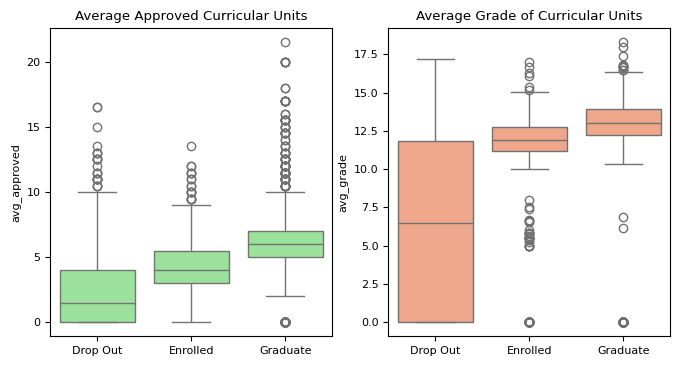

In [21]:
# Plot 'avg_approved' and 'avg_grade' vs. Target
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
sns.boxplot(data = stud_selected, x = 'Target_encoded', y = 'avg_approved',
            color = 'lightgreen', ax = ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

sns.boxplot(data = stud_selected, x = 'Target_encoded', y = 'avg_grade',
            color = 'lightsalmon', ax = ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

It's not surprising that 'Graduate' is associated with more approved curricular units and higher grades. However, there are some instances of a 0 value for average grade and average approved curricular units in the 'Graduate' class.

In [22]:
# Check the rows with zero average approved curricular units and students being graduade
stud_selected.loc[(stud_selected['avg_approved'] == 0) & (stud_selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade,avg_without_evaluations
20,1,1,3,2,1,1,1,1,10,9,...,11.1,0.6,2.02,2.0,0.0,0.0,0.0,0.0,0.0,0.0
66,1,1,3,2,1,1,13,14,6,4,...,10.8,1.4,1.74,2.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1,1,4,2,1,1,1,1,10,11,...,16.2,0.3,-0.92,2.0,0.0,0.0,0.0,0.0,0.0,0.0
405,1,1,1,2,1,1,1,14,4,10,...,12.7,3.7,-1.70,2.0,0.0,0.0,0.0,0.0,0.0,0.0
527,1,12,1,2,1,1,3,1,3,11,...,9.4,-0.8,-3.12,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1,8,2,2,1,1,3,1,3,7,...,15.5,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4291,1,1,1,2,1,1,1,28,5,6,...,15.5,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4353,1,1,1,2,1,1,3,1,5,5,...,12.4,0.5,1.79,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4365,1,1,2,2,1,1,23,28,5,10,...,7.6,2.6,0.32,2.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 75 data points where all data related to curricular units is zero, yet the students are labeled as 'Graduate.' This contradicts common sense, I will treat these rows as outliers and remove them from the dataset.

In [23]:
# Remove the outliers
stud_selected = stud_selected.drop(stud_selected.loc[(stud_selected['avg_approved'] == 0) & (stud_selected['Target_encoded'] == 2)].index)

# Check the rows with zero average grade and students being graduade
stud_selected.loc[(stud_selected['avg_grade'] == 0) & (stud_selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade,avg_without_evaluations


There is 0 rows with 0 average grade and students being graduade, meaning the 0 value for average grade and average approved curricular units in the 'Graduate' class correspond to the same data points.

In [24]:
# Drop unselected features along with the features that have been aggregated into new ones
stud_selected = stud_selected.drop(columns = ['Unemployment_rate', 'Inflation_rate',
                                              'avg_credited', 'avg_evaluations',
                                              'Curricular_units_1st_sem_credited',
                                              'Curricular_units_1st_sem_enrolled',
                                              'Curricular_units_1st_sem_evaluations',
                                              'Curricular_units_1st_sem_approved',
                                              'Curricular_units_1st_sem_grade',
                                              'Curricular_units_1st_sem_without_evaluations',
                                              'Curricular_units_2nd_sem_credited',
                                              'Curricular_units_2nd_sem_enrolled',
                                              'Curricular_units_2nd_sem_evaluations',
                                              'Curricular_units_2nd_sem_approved',
                                              'Curricular_units_2nd_sem_grade',
                                              'Curricular_units_2nd_sem_without_evaluations'])

In [25]:
stud_selected.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age,GDP,Target_encoded,avg_enrolled,avg_approved,avg_grade,avg_without_evaluations
0,1,8,5,2,1,1,13,10,6,10,...,1,1,0,20,1.74,0.0,0.0,0.0,0.000000,0.0
1,1,6,1,11,1,1,1,3,4,4,...,0,1,0,19,0.79,2.0,6.0,6.0,13.833333,0.0
2,1,1,5,5,1,1,22,27,10,10,...,0,1,0,19,1.74,0.0,6.0,0.0,0.000000,0.0
3,1,8,2,15,1,1,23,27,6,4,...,1,0,0,20,-3.12,2.0,6.0,5.5,12.914286,0.0
4,2,12,1,3,0,1,22,28,10,10,...,1,0,0,45,0.79,2.0,6.0,5.5,12.666667,0.0


In [26]:
stud_selected.dtypes

,0
Marital_status,category
Application_mode,category
Application_order,category
Course,category
Daytime/evening_attendance,category
Previous_qualification,category
Mother_qualification,category
Father_qualification,category
Mother_occupation,category
Father_occupation,category


# Clustering

In [27]:
def kmeans(X, k, max_iter=100, tolerance = 1e-4):
    n_samples, n_features = X.shape
    np.random.seed(105)
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    cluster_labels = np.zeros(n_samples, dtype=int)

    for iteration in range(max_iter):
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)  # Compute distance to each centroid
            cluster_labels[i] = np.argmin(distances)  # Assign the closest centroid

        new_centroids = np.array([X[cluster_labels == j].mean(axis=0) if np.any(cluster_labels == j) else centroids[j] for j in range(k)])

        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            break

        centroids = new_centroids

    return cluster_labels, centroids

In [28]:
def find_optimal_k(X, max_k=10):
    inertia_values = []
    for k in range(1, max_k + 1):
        _, centroids = kmeans(X, k)
        inertia = sum(np.min([np.linalg.norm(X - centroid, axis=1)**2 for centroid in centroids], axis=0))
        inertia_values.append(inertia)

    optimal_k = np.argmin(np.gradient(np.gradient(inertia_values))) + 1
    return inertia_values, optimal_k

In [29]:
inertia_vals, k = find_optimal_k(stud_selected.values, max_k=10)
print(k)


Converged in 2 iterations.
Converged in 8 iterations.
Converged in 11 iterations.
Converged in 7 iterations.
Converged in 12 iterations.
Converged in 29 iterations.
Converged in 27 iterations.
Converged in 25 iterations.
Converged in 26 iterations.
Converged in 16 iterations.
7


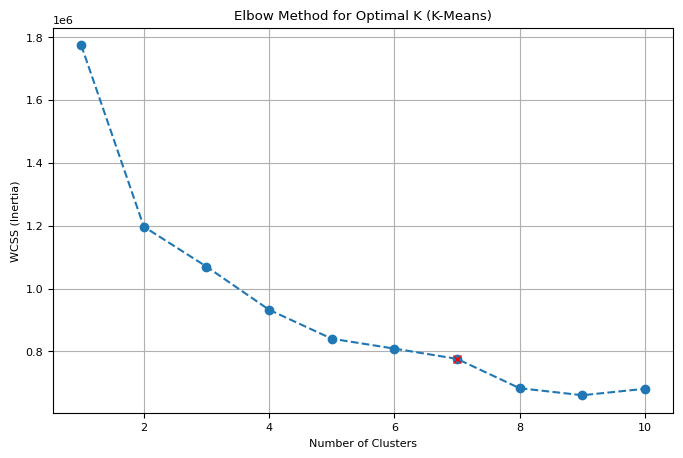

In [30]:
# Plot the Elbow Method for K-Means

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10 + 1), inertia_vals, marker="o", linestyle="--")
plt.plot(k, inertia_vals[k - 1], marker="x", c = "red")
plt.title("Elbow Method for Optimal K (K-Means)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid()
plt.show()

From this we can say the optimal number of clusters is 7

In [31]:
labels, centroids = kmeans(stud_selected.values, k)

Converged in 27 iterations.


In [32]:
df = stud_selected.copy()
df['Target_encoded'] = df['Target_encoded'].astype('category')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
df['Cluster'] = labels
print("\n=== Cluster Analysis ===\n")
# 1. Cluster Sizes
print("Cluster Sizes:")
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

#2. Cluster means
clusters = df['Cluster'].unique()
for cluster in clusters:
    print(f"\n--- Cluster {cluster} ---\n")

    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Mode for categorical variables
    print("Categorical Variables:")
    for col in categorical_cols:
        mode = cluster_data[col].mode().iloc[0]
        print(f"  {col}: Mode = {mode}")

    # Mean and Median for numerical variables
    print("\nNumerical Variables:")
    for col in numerical_cols:
        mean = cluster_data[col].mean()
        median = cluster_data[col].median()
        print(f"  {col}: Mean = {mean:.2f}, Median = {median:.2f}")




=== Cluster Analysis ===

Cluster Sizes:
Cluster
4    944
2    866
3    642
6    591
1    591
5    527
0    188
Name: count, dtype: int64

--- Cluster 5 ---

Categorical Variables:
  Marital_status: Mode = 1
  Application_mode: Mode = 1
  Application_order: Mode = 1
  Course: Mode = 12
  Daytime/evening_attendance: Mode = 1
  Previous_qualification: Mode = 1
  Mother_qualification: Mode = 13
  Father_qualification: Mode = 1
  Mother_occupation: Mode = 10
  Father_occupation: Mode = 5
  Displaced: Mode = 1
  Debtor: Mode = 0
  Tuition_fees_up_to_date: Mode = 1
  Gender: Mode = 0
  Scholarship_holder: Mode = 0
  Target_encoded: Mode = 2.0

Numerical Variables:
  Age: Mean = 21.28, Median = 20.00
  GDP: Mean = 0.05, Median = 0.79
  avg_enrolled: Mean = 6.31, Median = 6.00
  avg_approved: Mean = 4.57, Median = 5.00
  avg_grade: Mean = 10.57, Median = 12.33
  avg_without_evaluations: Mean = 0.17, Median = 0.00

--- Cluster 4 ---

Categorical Variables:
  Marital_status: Mode = 1
  Applicat

# Softmax

In [33]:
def softmax( z):
    #Compute the softmax for each row of the input z.
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss( y, y_pred):
    #Compute the cross-entropy loss.
    m = y.shape[0]
    return -np.sum(y * np.log(y_pred + 1e-15)) / m  # Add epsilon to avoid log(0)

def one_hot_encode( y, num_classes):
    #Convert labels to one-hot encoded format.
    m = len(y)
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), y] = 1
    return one_hot

def model_fit( X, y, epochs, learning_rate):
    """
    Train the model using gradient descent.

    Parameters:
    X (numpy.ndarray): Training data (n_samples, n_features).
    y (numpy.ndarray): Target labels (n_samples,).

    return predict(X): function which predicts class labels
    """

    num_samples, num_features = X.shape
    y = y.astype(int)
    num_classes = len(np.unique(y))
    loss_history = []
    # Initialize weights and biases
    weights = np.random.randn(num_features, num_classes) * 0.01
    bias = np.zeros((1, num_classes))

    # One-hot encode the target variable
    y_one_hot = one_hot_encode(y, num_classes)

    for epoch in range(epochs):
        # Compute linear scores
        z = np.dot(X, weights) + bias

        # Apply softmax to compute probabilities
        y_pred = softmax(z)

        # Compute loss
        loss = cross_entropy_loss(y_one_hot, y_pred)
        loss_history.append(loss)

        # Compute gradients
        dz = y_pred - y_one_hot
        dw = np.dot(X.T, dz) / num_samples
        db = np.sum(dz, axis=0, keepdims=True) / num_samples

        # Update weights and biases
        weights -= learning_rate * dw
        bias -= learning_rate * db

    def predict(X):
      """
      Predict the class labels for the input data.

      Parameters:
      X (numpy.ndarray): Input data (n_samples, n_features).

      Returns:
      numpy.ndarray: Predicted class labels.
      """
      z = np.dot(X, weights) + bias
      y_pred = softmax(z)
      return np.argmax(y_pred, axis=1)
    return predict

# SVM

In [34]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Convert y to {-1, 1} format
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Gradient update for correct classification
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Gradient update for misclassification
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        # Return sign of the prediction
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)



In [35]:
# Split the data into training and test set
train, test = train_test_split(stud_selected, test_size = 0.2,
                               stratify = stud_selected['Target_encoded'], random_state = 0)

# Extract features and labels
train_features = train.drop('Target_encoded', axis = 1)
train_labels = train['Target_encoded']
test_features = test.drop('Target_encoded', axis = 1)
test_labels = test['Target_encoded']

In [36]:

train_features = np.array(train_features, dtype=float)
test_features = np.array(test_features, dtype=float)


In [37]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Train the manual SVM on the training set
svm_model = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=2000)
svm_model.fit(train_features, train_labels)

# Predictions
# y_pred = svm_model.predict(test_features)
y_pred = svm_model.predict(train_features)

# Decision scores for AUC calculation
# y_decision = np.dot(test_features, svm_model.w) + svm_model.b
y_decision = np.dot(train_features, svm_model.w) + svm_model.b


# Convert labels to one-hot encoding for multi-class AUC
lb = LabelBinarizer()
# test_labels_binarized = lb.fit_transform(test_labels)
train_labels_binarized = lb.fit_transform(train_labels)


# Metrics calculation
svm_accuracy = round(balanced_accuracy_score(train_labels, y_pred), 3)
svm_f1score = round(f1_score(train_labels, y_pred, average='macro'), 3)

if len(y_decision.shape) == 1:
    y_decision = y_decision.reshape(-1, 1)

svm_auc = round(roc_auc_score(train_labels_binarized, y_decision, average='macro', multi_class='ovr'), 3)

# Print performance metrics
print('Manual SVM Baseline Performance:')
print('Balanced Accuracy:', svm_accuracy)
print('F1 Score:', svm_f1score)
print('AUC Score:', svm_auc)


Manual SVM Baseline Performance:
Balanced Accuracy: 0.267
F1 Score: 0.077
AUC Score: 0.277


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [38]:
print(y_pred)
print(train_labels)

[ 1.  1. -1. ...  1.  1.  1.]
4001    0.0
1179    2.0
2349    2.0
1950    0.0
1221    2.0
       ... 
255     0.0
1019    2.0
1981    2.0
1761    0.0
2855    0.0
Name: Target_encoded, Length: 3479, dtype: float64


In [39]:
classifier = model_fit(X=train_features, y =train_labels, epochs = 1000, learning_rate = 0.01)
y_pred = classifier(test_features)


In [40]:
correct_predictions = np.sum(y_pred == test_labels)
total_samples = len(test_labels)
accuracy = correct_predictions / total_samples
print("Accuracy For SoftMax Logistic Regression:", accuracy)

Accuracy For SoftMax Logistic Regression: 0.671264367816092


In [41]:
def confusion_matrix(y_true, y_pred, num_classes):
    # Initialize confusion matrix of shape (num_classes, num_classes)
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Populate the confusion matrix
    for t, p in zip(y_true, y_pred):
        matrix[t, p] += 1

    return matrix


In [42]:
confusion_matrix = confusion_matrix(test_labels, y_pred, 3)
print(confusion_matrix)

[[223  43  18]
 [ 52  82  25]
 [ 35 113 279]]


# **Naive Bayes**

In [43]:
class NaiveBayes:
    def __init__(self):
        self.classes = None  # List of unique classes
        self.priors = {}  # Prior probabilities for each class
        self.likelihoods = {}  # Likelihood of features for each class

    def fit(self, X, y):
        """
        Train the Naive Bayes model.
        :param X: np.array, shape (n_samples, n_features), feature matrix
        :param y: np.array, shape (n_samples,), target vector
        """
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        # Calculate priors and likelihoods
        for cls in self.classes:
            X_cls = X[y == cls]  # Filter samples of the current class
            self.priors[cls] = X_cls.shape[0] / n_samples

            # Compute likelihoods: P(feature|class)
            self.likelihoods[cls] = {
                feature_idx: {
                    value: (np.sum(X_cls[:, feature_idx] == value) + 1) / (X_cls.shape[0] + len(np.unique(X[:, feature_idx])))
                    for value in np.unique(X[:, feature_idx])
                }
                for feature_idx in range(n_features)
            }

    def predict(self, X):
        """
        Predict the class labels for a given dataset.
        :param X: np.array, shape (n_samples, n_features), feature matrix
        :return: np.array, predicted class labels
        """
        y_pred = []
        for sample in X:
            posteriors = {}
            for cls in self.classes:
                prior = np.log(self.priors[cls])  # Log of prior probability
                likelihood = np.sum([
                    np.log(self.likelihoods[cls][feature_idx].get(sample[feature_idx], 1e-6))
                    for feature_idx in range(len(sample))
                ])
                posteriors[cls] = prior + likelihood

            y_pred.append(max(posteriors, key=posteriors.get))
        return np.array(y_pred)

Confusion matrix[i][j] represents tuple of true class i is predicted as class j

In [44]:
nb = NaiveBayes()
nb.fit(train_features, train_labels)

In [45]:
y_pred = nb.predict(test_features)

In [46]:
nb_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)

In [52]:
print("Accuracy Using the Naive Bayes is: ",nb_accuracy)


Accuracy Using the Naive Bayes is:  0.66
